# Import packages and data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
TRAIN_SET = '../data/Hotel-A-train.csv'
VAL_SET = '../data/Hotel-A-validation.csv'
TEST_SET = '../data/Hotel-A-test.csv'

In [3]:
df = pd.read_csv(TRAIN_SET, index_col='Reservation-id', parse_dates=['Expected_checkin', 'Expected_checkout', 'Booking_date'])
df_val = pd.read_csv(VAL_SET, index_col='Reservation-id', parse_dates=['Expected_checkin', 'Expected_checkout', 'Booking_date'])
df_test = pd.read_csv(TEST_SET, index_col='Reservation-id', parse_dates=['Expected_checkin', 'Expected_checkout', 'Booking_date'])

# Pandas Profiling

In [ ]:
prof = ProfileReport(df)
prof.to_file(output_file='../output/pandas_profile.html')

In [ ]:
val_prof = ProfileReport(df_val)
val_prof.to_file(output_file='../output/pandas_profile_val.html')

# Dataset Statistics

In [21]:
df.index.value_counts().value_counts()

1    27491
2        4
Name: Reservation-id, dtype: int64

In [5]:
df.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
Reservation-id,,,,,,,,,,,,,,,,,,,,,
39428300,F,40,Latino,Grad,<25K,North,City Hotel,2015-07-01,2015-07-02,2015-05-21,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,2015-07-01,2015-07-02,2015-05-26,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
73747291,F,42,caucasian,Grad,<25K,East,City Hotel,2015-07-02,2015-07-06,2015-06-29,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
67301739,M,25,African American,College,>100K,South,Airport Hotels,2015-07-02,2015-07-03,2015-06-20,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
77222321,F,62,Latino,High-School,25K --50K,East,Resort,2015-07-03,2015-07-04,2015-06-20,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [6]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [7]:
df.dtypes

Gender                            object
Age                                int64
Ethnicity                         object
Educational_Level                 object
Income                            object
Country_region                    object
Hotel_Type                        object
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date              datetime64[ns]
Adults                             int64
Children                           int64
Babies                             int64
Meal_Type                         object
Visted_Previously                 object
Previous_Cancellations            object
Deposit_type                      object
Booking_channel                   object
Required_Car_Parking              object
Reservation_Status                object
Use_Promotion                     object
Discount_Rate                      int64
Room_Rate                          int64
dtype: object

In [8]:
df.shape

(27499, 23)

In [9]:
df.index.nunique()

27495

<AxesSubplot:>

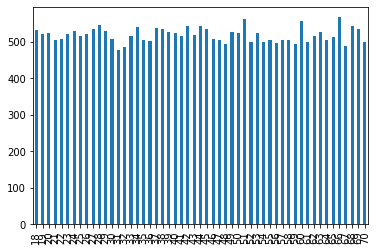

In [10]:
df.Age.value_counts().sort_index().plot.bar()

# Row number vs Labels

In [11]:
df['row_num'] = [i for i in range(df.shape[0])]

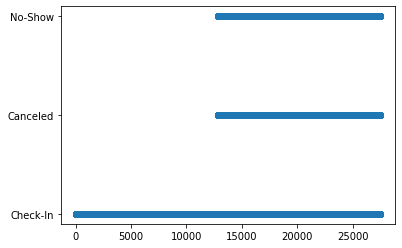

In [12]:
plt.scatter(df.row_num, df.Reservation_Status)

In [13]:
df['row_num_div_100'] = np.floor((df.row_num/100))

<AxesSubplot:xlabel='row_num_div_100', ylabel='Booking_date'>

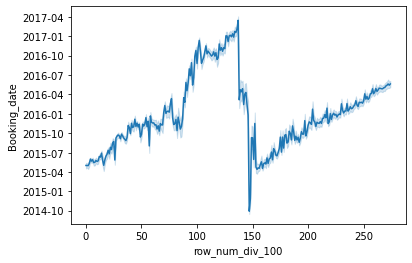

In [14]:
sns.lineplot(x='row_num_div_100', y='Booking_date', data=df)

In [15]:
df_grp = df.groupby('row_num_div_100').Reservation_Status.value_counts()

In [16]:
df_grp.index.names = ['x', 'y']

In [17]:
df_grp_r = df_grp.reset_index()

<AxesSubplot:xlabel='x', ylabel='Reservation_Status'>

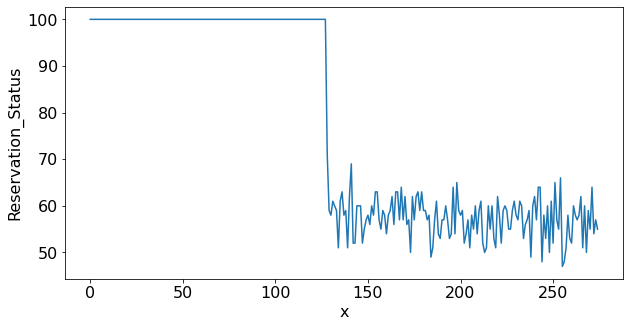

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(x='x', y='Reservation_Status', data=df_grp_r[df_grp_r.y == 'Check-In'])

<AxesSubplot:xlabel='x', ylabel='Reservation_Status'>

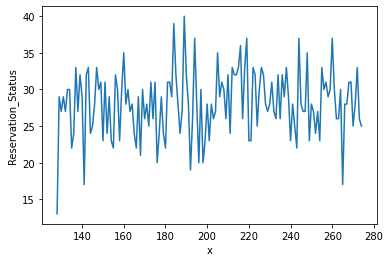

In [19]:
sns.lineplot(x='x', y='Reservation_Status', data=df_grp_r[df_grp_r.y == 'Canceled'])

<AxesSubplot:xlabel='x', ylabel='Reservation_Status'>

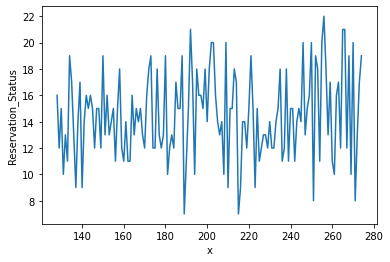

In [20]:
sns.lineplot(x='x', y='Reservation_Status', data=df_grp_r[df_grp_r.y == 'No-Show'])

# Categorical Columns vs Labels

df.columns

In [25]:
cat_cols = ['Previous_Cancellations',
     'Country_region',
     'Required_Car_Parking',
     'Deposit_type',
     'Ethnicity',
     'Income',
     'Gender',
     'Visted_Previously',
     'Educational_Level',
     'Booking_channel',
     'Hotel_Type',
     'Use_Promotion',
     'Meal_Type']

In [29]:
num_cols = ['Babies',
     'row_num',
     'Reservation_Status',
     'Discount_Rate',
     'Adults',
     'Expected_checkin',
     'Children',
     'Room_Rate',
     'Age',
     'Booking_date',
     'row_num_div_100',
     'Expected_checkout']

In [30]:
df_num = df[num_cols + ['Reservation_Status']]

In [91]:
df.Discount_Rate.value_counts()

0     6829
10    5469
20    4162
5     4159
25    2721
15    1443
40    1373
30    1343
Name: Discount_Rate, dtype: int64

c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


array([[<AxesSubplot:title={'center':'Adults'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Babies'}>,
        <AxesSubplot:title={'center':'Children'}>],
       [<AxesSubplot:title={'center':'Discount_Rate'}>,
        <AxesSubplot:title={'center':'Room_Rate'}>]], dtype=object)

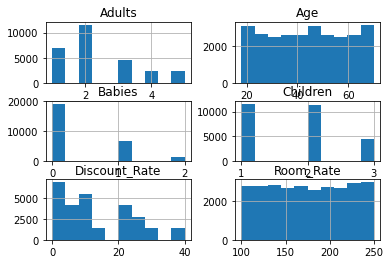

In [90]:
df_num.hist()

In [92]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type',
       'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
       'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

<AxesSubplot:xlabel='Meal_Type', ylabel='Room_Rate'>

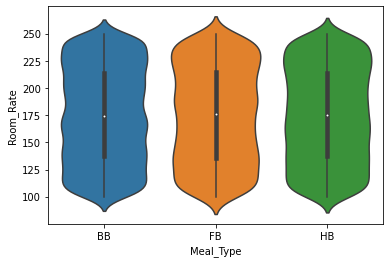

In [96]:
sns.violinplot(x='Meal_Type', y='Room_Rate', data=df)

<AxesSubplot:title={'center':'Room_Rate'}, xlabel='Meal_Type'>

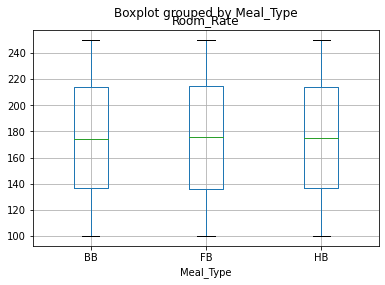

In [93]:
df.boxplot(column='Room_Rate', by='Meal_Type')

## Numeric columns vs Labels

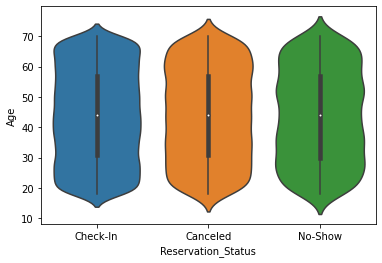

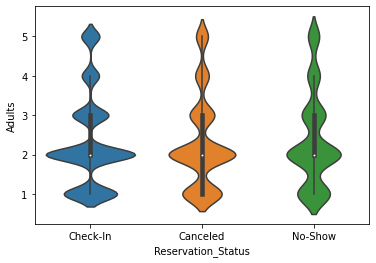

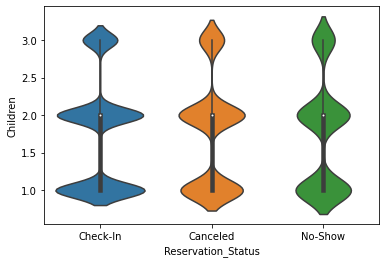

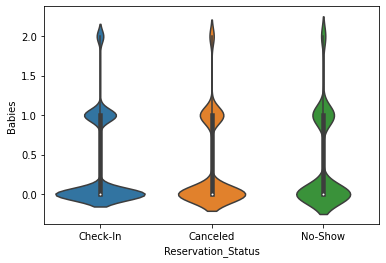

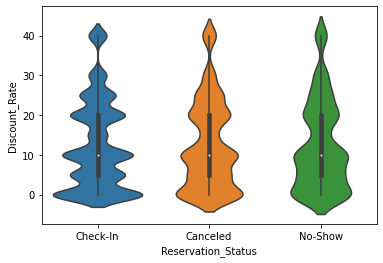

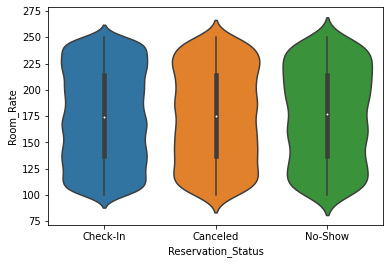

In [89]:
for col in num_cols:
    plt.figure()
    sns.violinplot(x='Reservation_Status', y=col, data=df_num)

<AxesSubplot:title={'center':'Age'}, xlabel='Reservation_Status'>

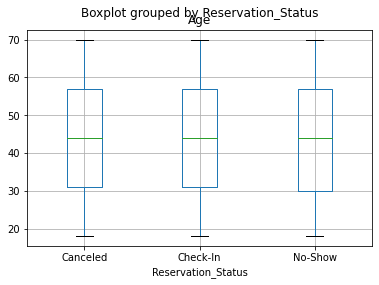

In [86]:
df_num.boxplot(column='Age', by='Reservation_Status')

## Categorical columns stacked barplot

c:\users\nisal_105136\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

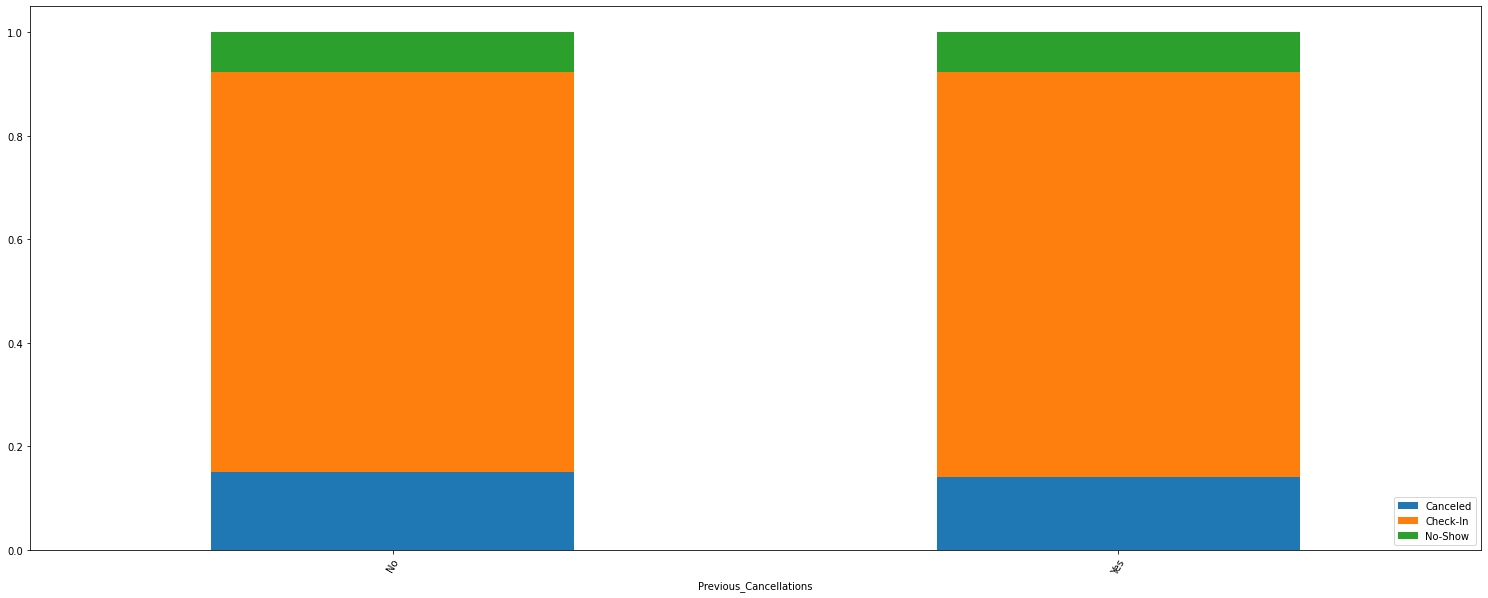

<Figure size 432x288 with 0 Axes>

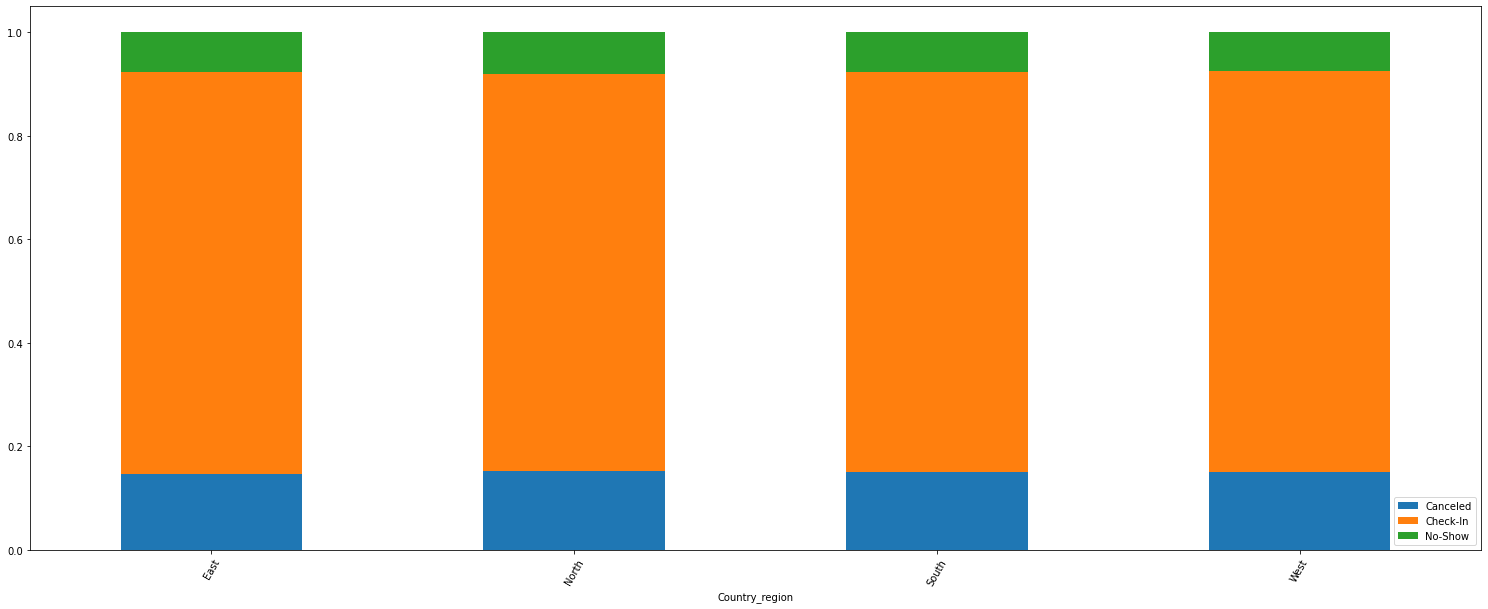

<Figure size 432x288 with 0 Axes>

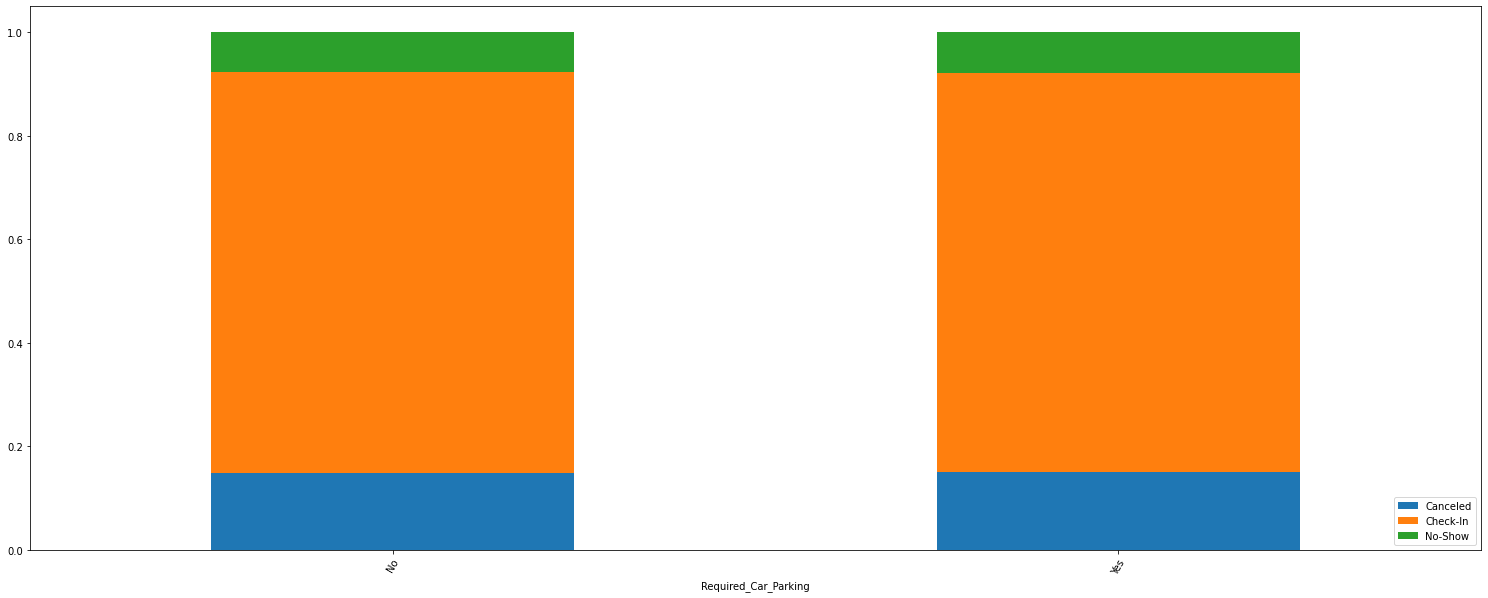

<Figure size 432x288 with 0 Axes>

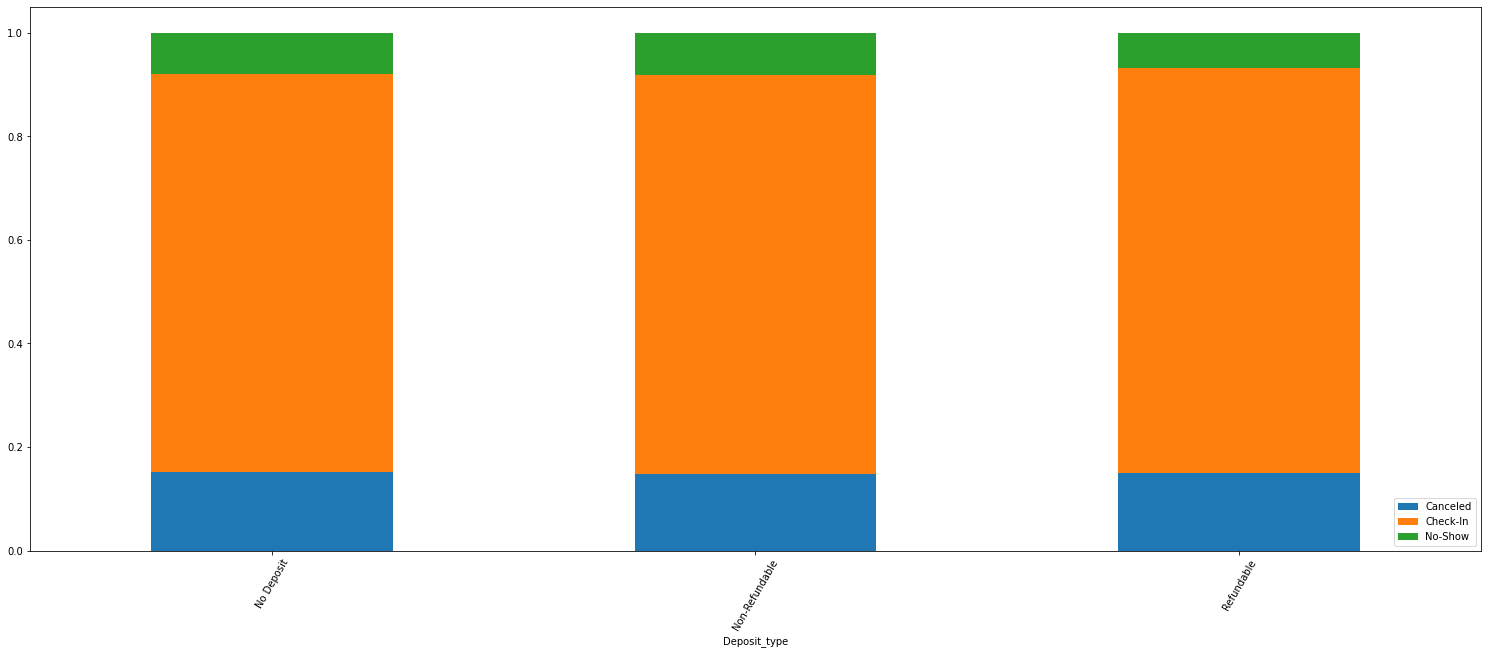

<Figure size 432x288 with 0 Axes>

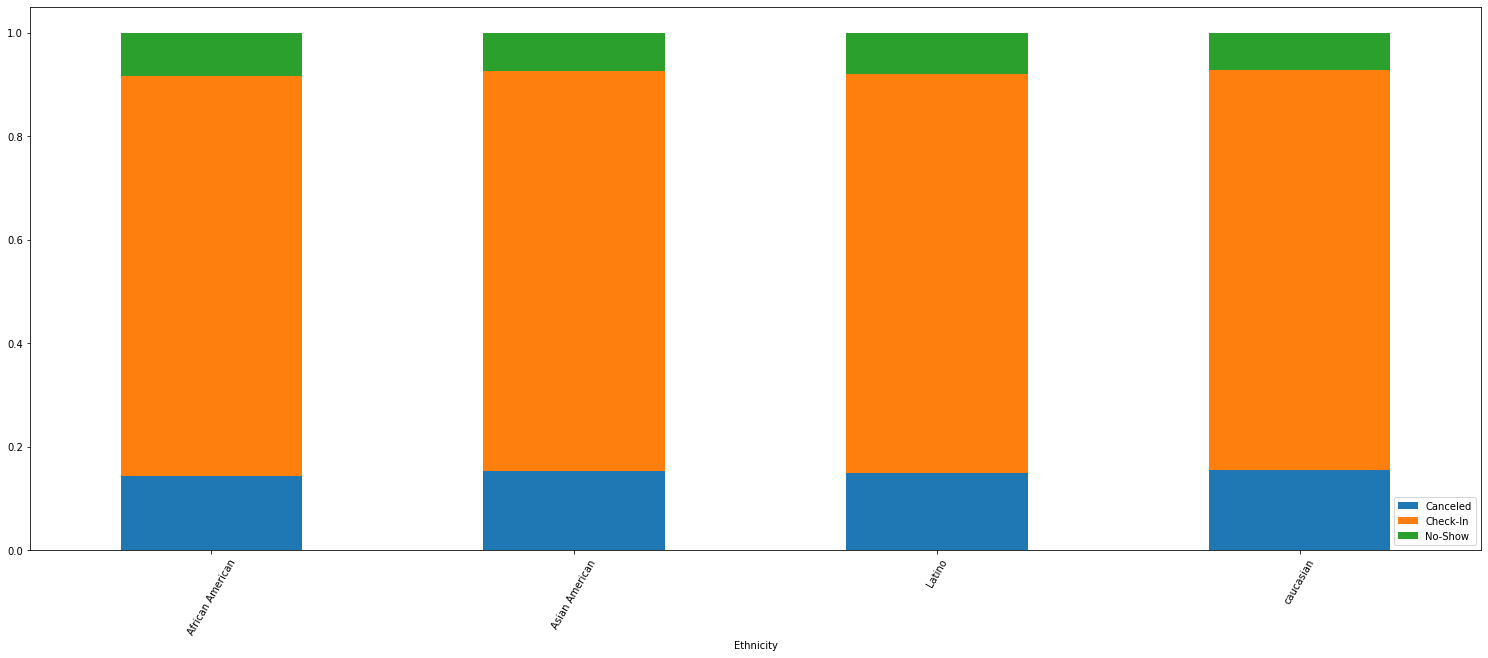

<Figure size 432x288 with 0 Axes>

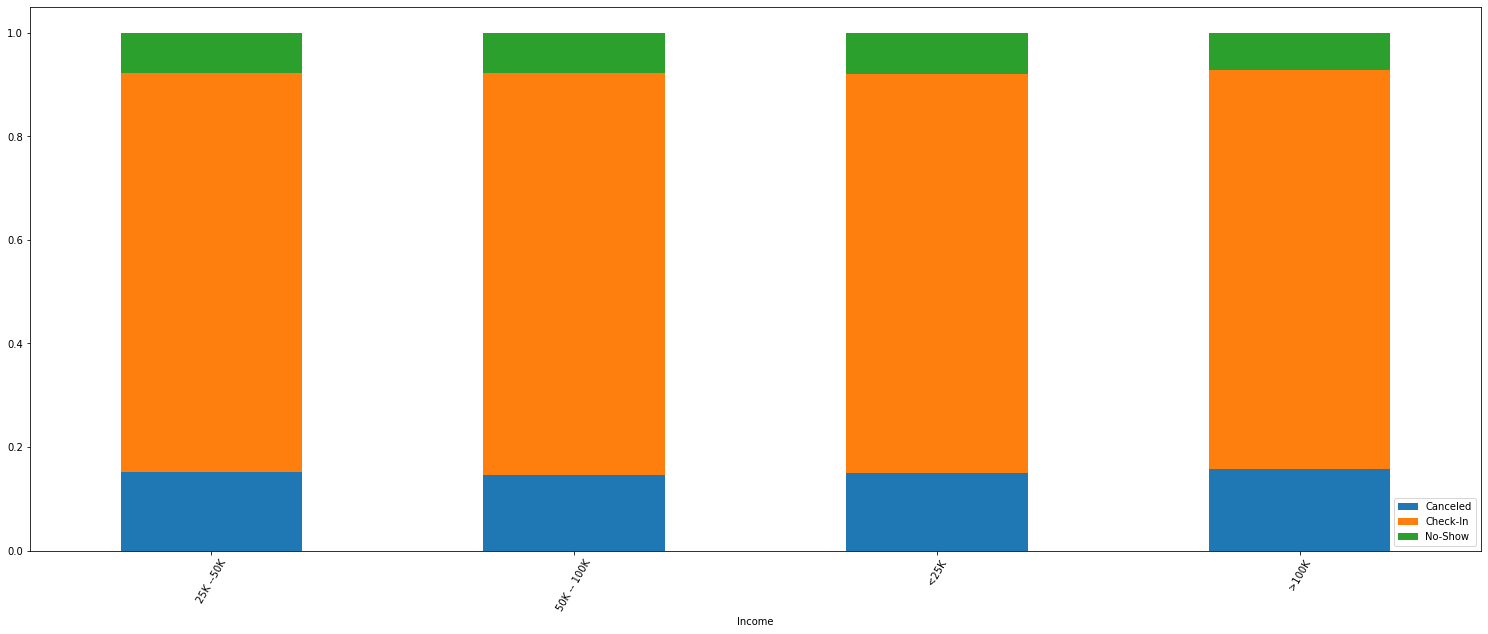

<Figure size 432x288 with 0 Axes>

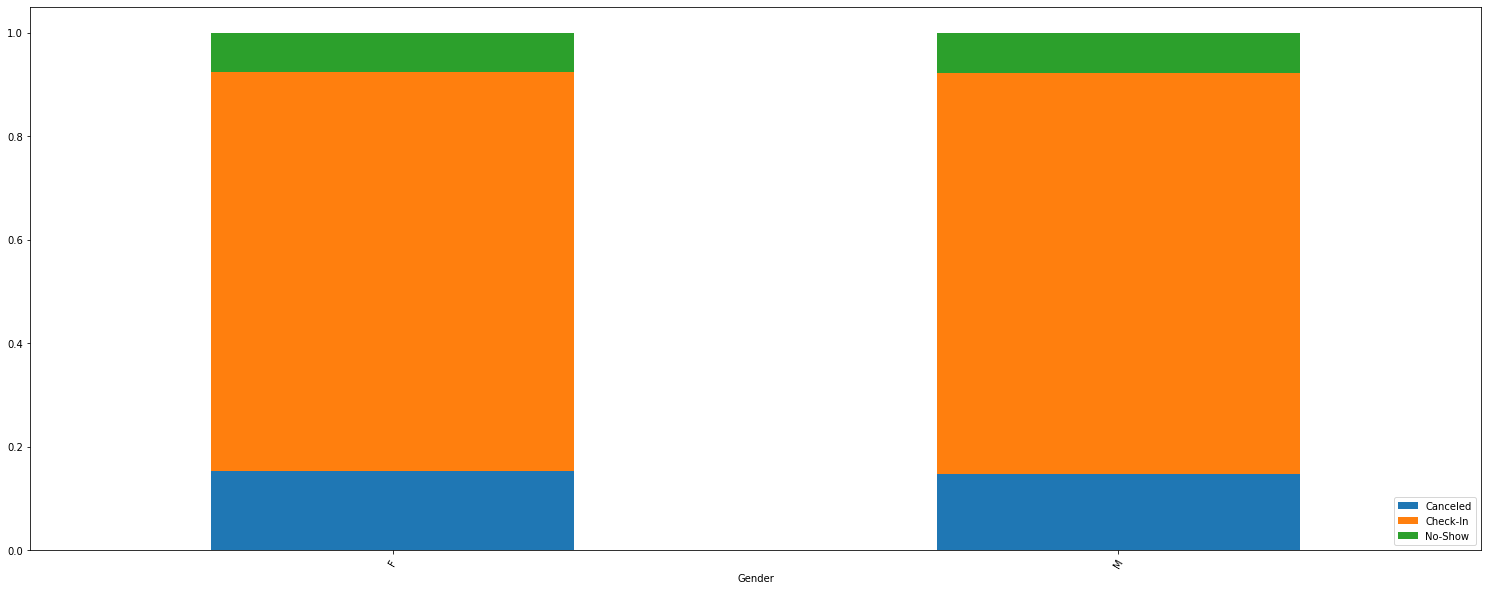

<Figure size 432x288 with 0 Axes>

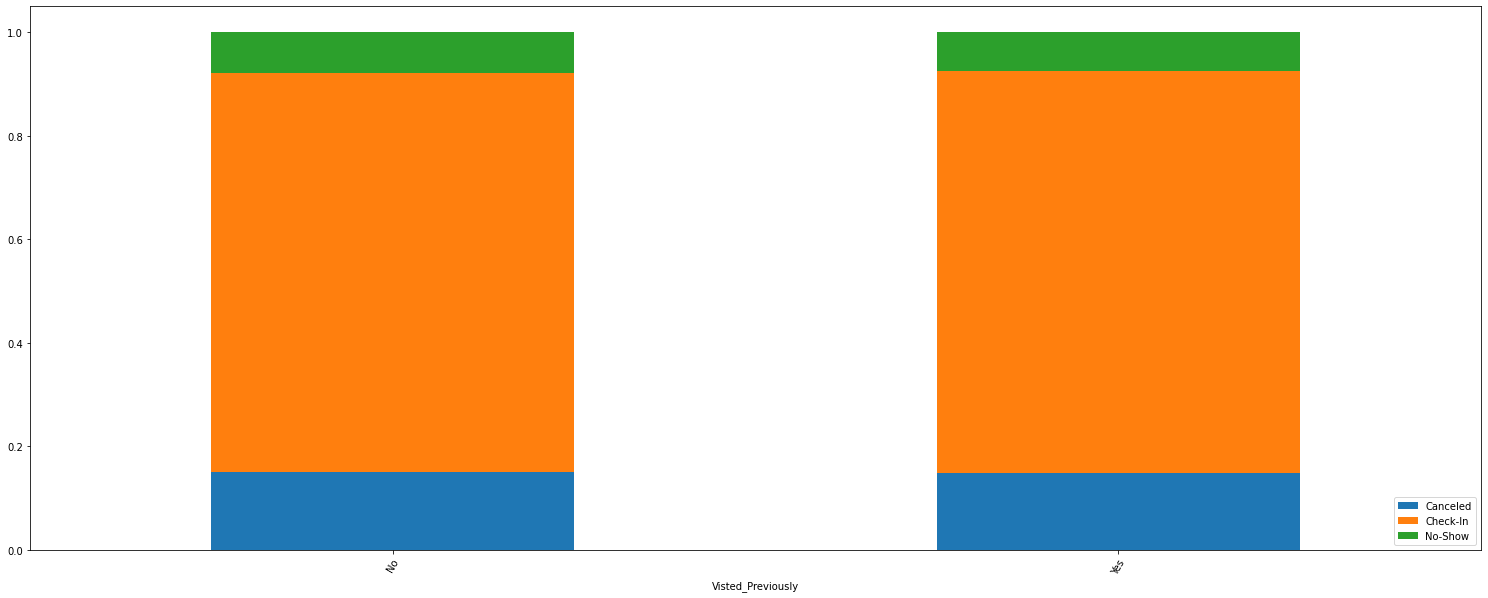

<Figure size 432x288 with 0 Axes>

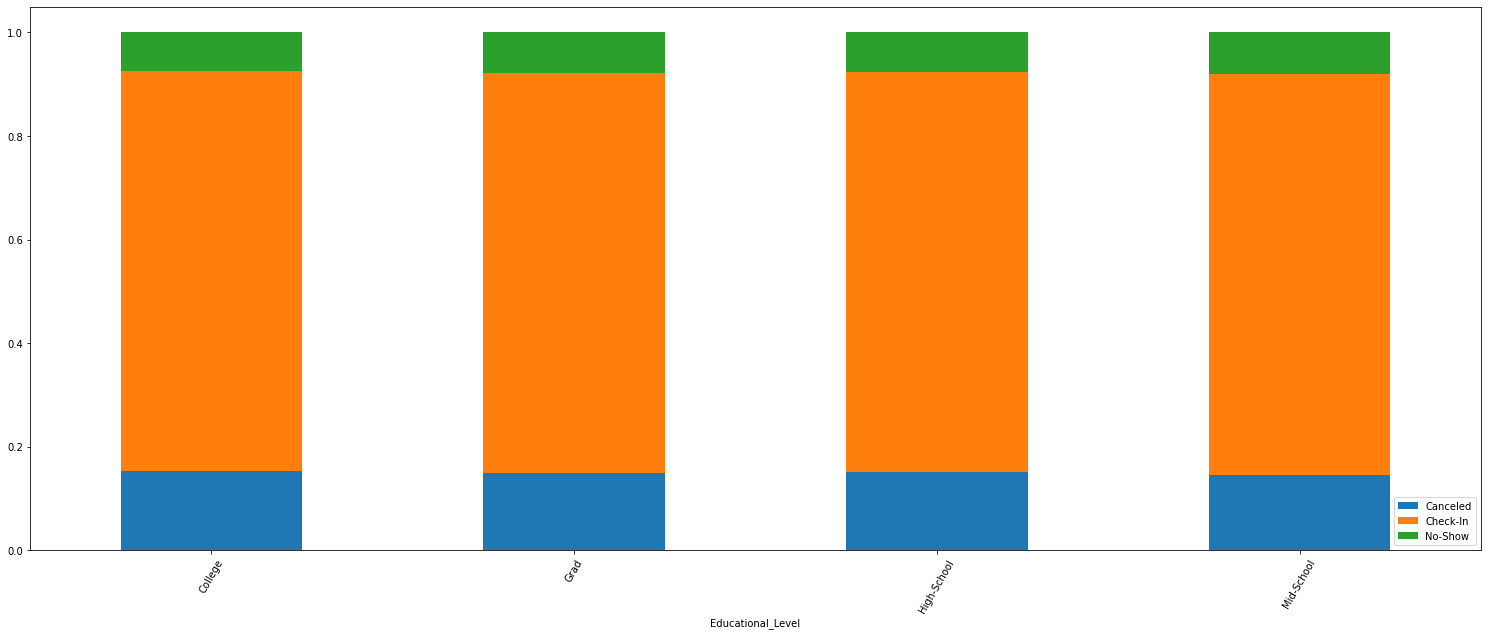

<Figure size 432x288 with 0 Axes>

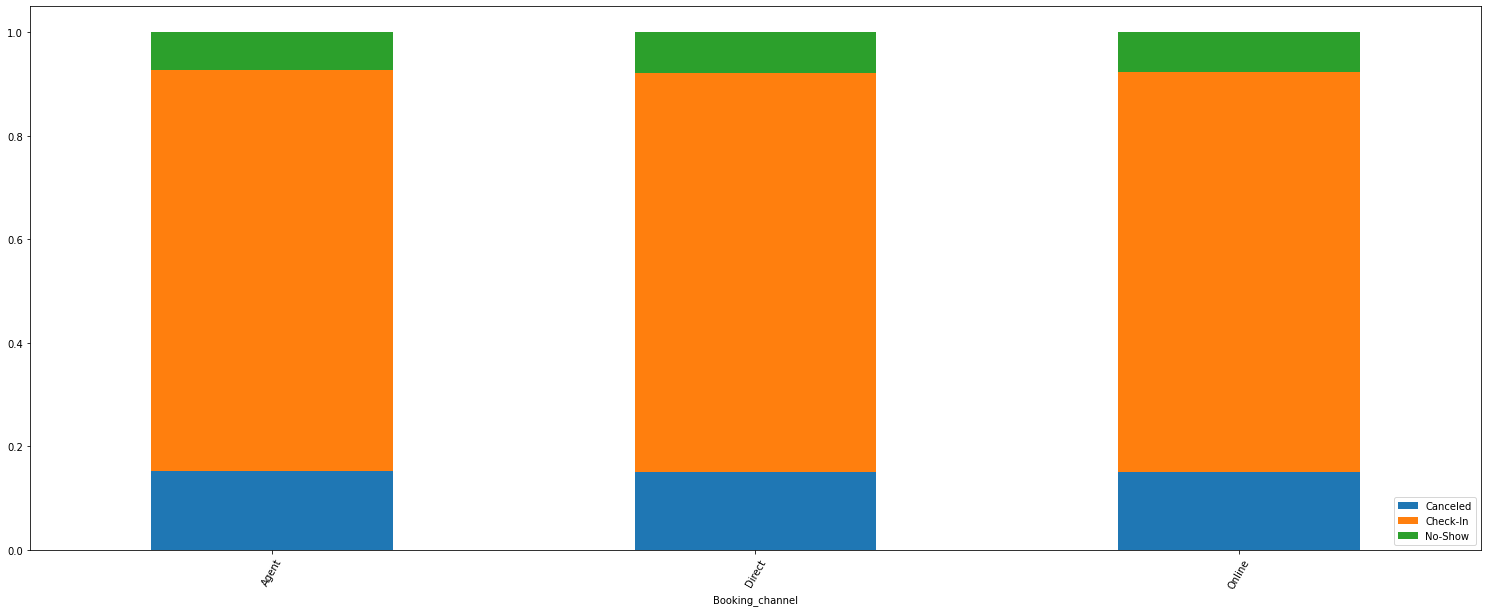

<Figure size 432x288 with 0 Axes>

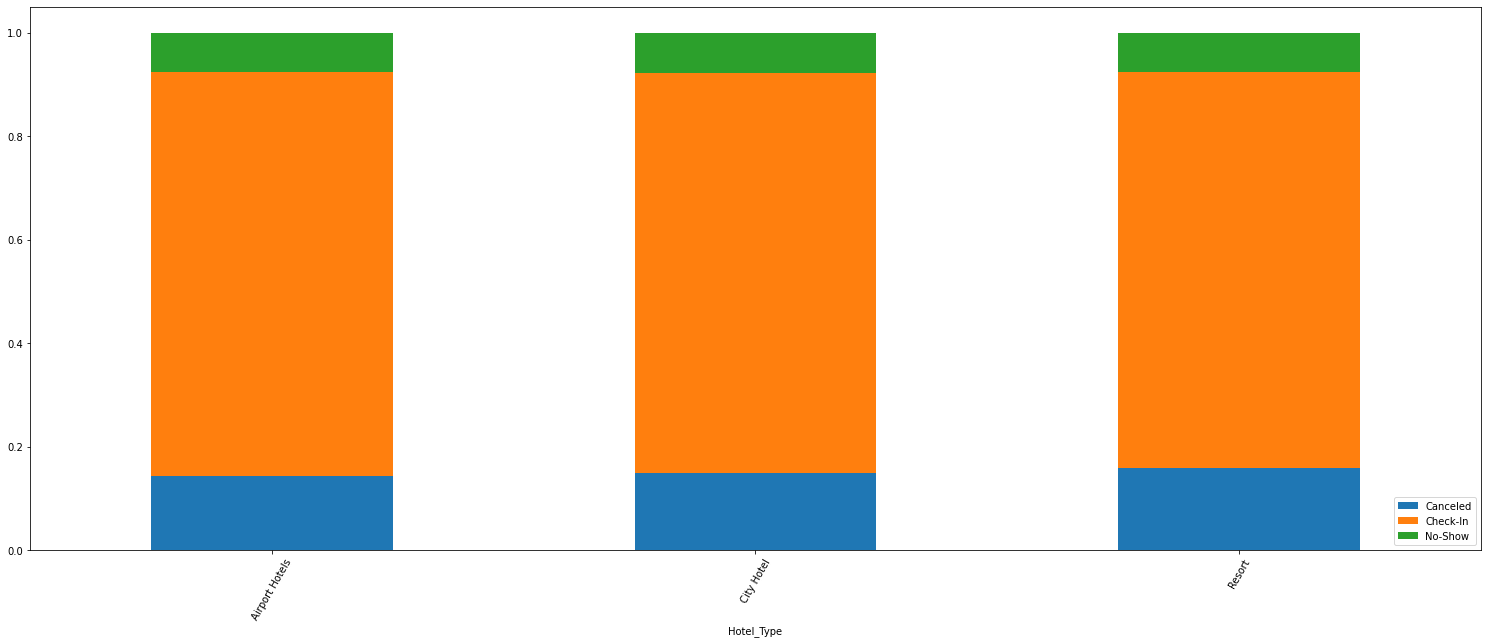

<Figure size 432x288 with 0 Axes>

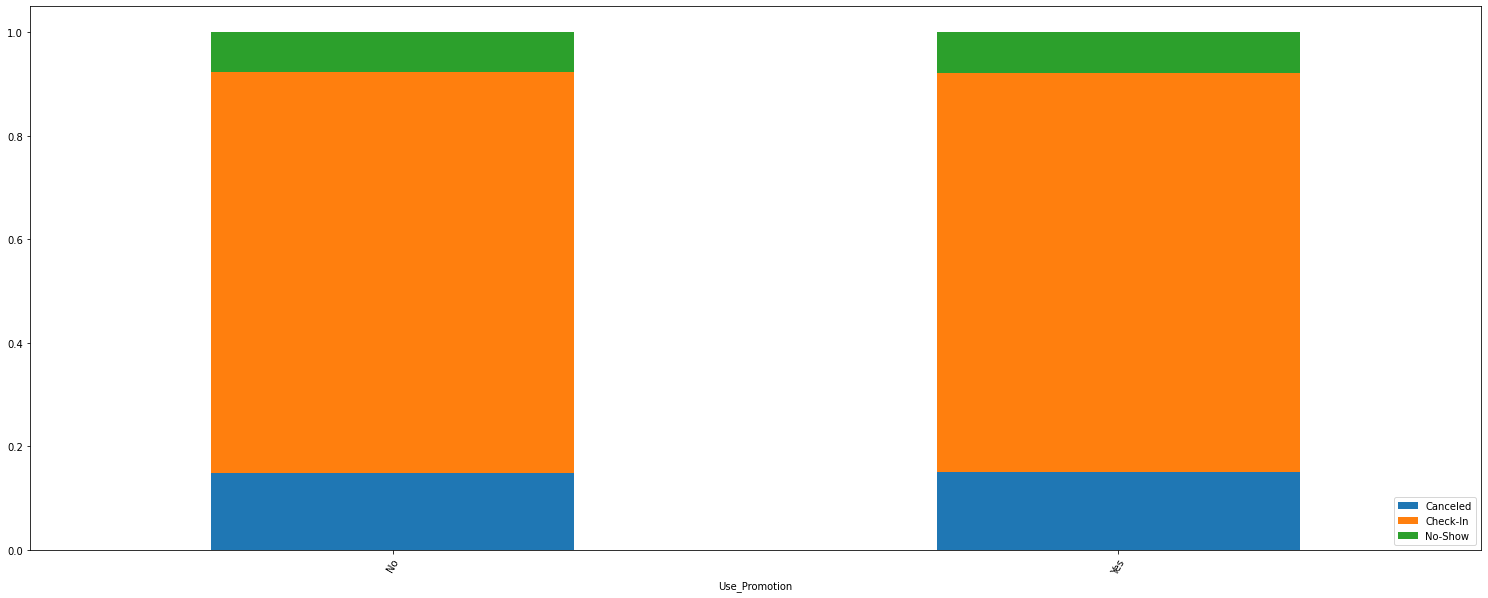

<Figure size 432x288 with 0 Axes>

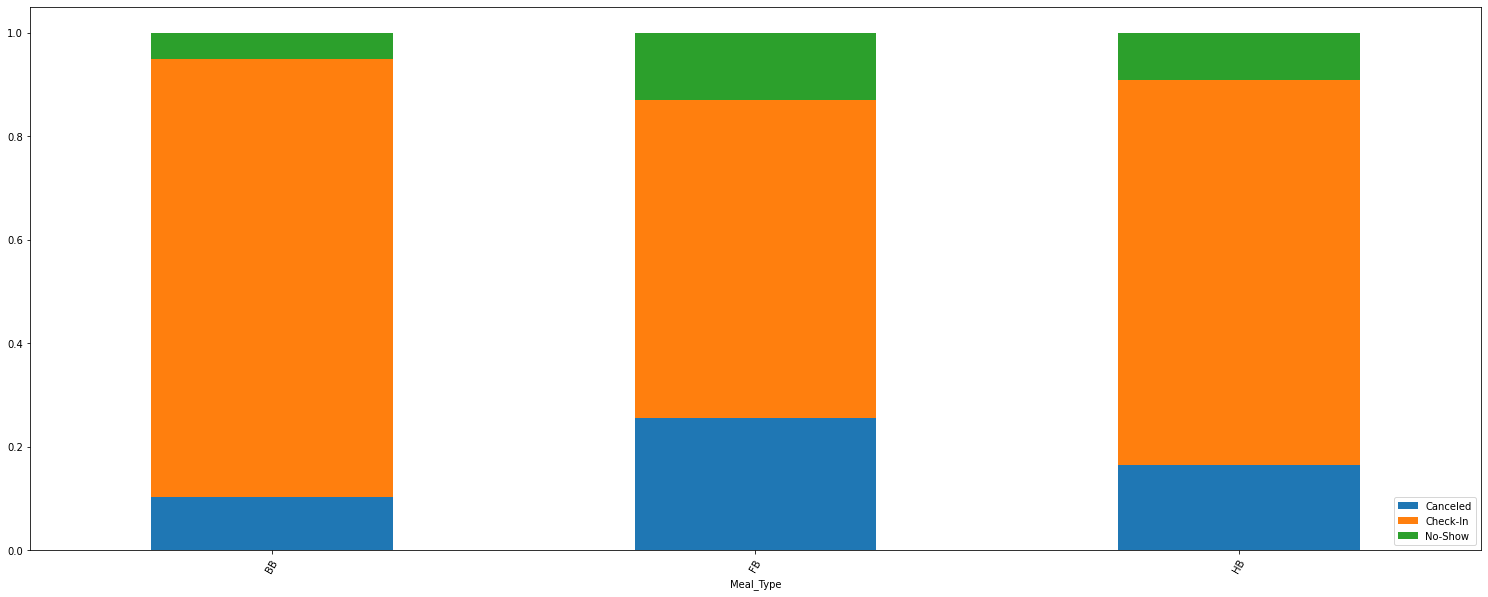

In [72]:
for col in cat_cols:
    plt.figure()
    df_cat = df.groupby(col).Reservation_Status.value_counts().unstack().sort_index()
    df_cat.divide(df_cat.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(26,10), rot=60)
    plt.legend(loc='lower right')